In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_hujan = pd.read_csv('Dataset/curah-hujan-2018-new.csv')
df_yield = pd.read_csv('Dataset/hasil-panen-2018-new.csv')

In [3]:
df_yield

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg)
0,2018,Januari,43573.0,449.24,2781.16
1,2018,Februari,43573.0,16598.03,102755.27
2,2018,Maret,43573.0,9352.41,57899.01
3,2018,April,43573.0,2512.02,15551.44
4,2018,Mei,43573.0,9882.90,57103.19
5,2018,Juni,43573.0,7680.37,44377.02
6,2018,Juli,43573.0,3594.00,20766.00
7,2018,Agustus,43573.0,1793.23,10361.25
8,2018,September,43573.0,2663.34,18230.62
9,2018,Oktober,43573.0,1703.87,11663.03


In [4]:
## Data Yield
df_yield.to_csv('panen.csv', index=False)
df_panen_baru = pd.read_csv('panen.csv')
# df_panen_baru['Produksi Padi (ton/gkg)'] = pd.to_numeric(df_panen_baru['Produksi Padi (ton/gkg)'],errors='coerce')
# df_panen_baru = df_panen_baru.loc[:, ~df_panen_baru.columns.str.contains('^Unnamed')]
data = pd.merge(df_panen_baru, df_hujan, on=['Tahun', 'Bulan'])

# df_panen_baru.info()

In [5]:
# data = df_panen_baru

In [6]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2018,Januari,43573.0,449.24,2781.16,296.10
1,2018,Februari,43573.0,16598.03,102755.27,273.90
2,2018,Maret,43573.0,9352.41,57899.01,250.60
3,2018,April,43573.0,2512.02,15551.44,177.30
4,2018,Mei,43573.0,9882.90,57103.19,41.30
5,2018,Juni,43573.0,7680.37,44377.02,0.00
6,2018,Juli,43573.0,3594.00,20766.00,0.00
7,2018,Agustus,43573.0,1793.23,10361.25,0.00
8,2018,September,43573.0,2663.34,18230.62,133.30
9,2018,Oktober,43573.0,1703.87,11663.03,142.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tahun                    60 non-null     int64  
 1   Bulan                    60 non-null     object 
 2   Luas Lahan               60 non-null     float64
 3   Luas Panen (ha)          60 non-null     float64
 4   Produksi Padi (ton/gkg)  60 non-null     float64
 5   curah hujan (mm)         60 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


In [8]:
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

In [9]:
data['Bulan'] = data['Bulan'].map(month_mapping)

In [10]:
data.shape

(60, 6)

In [11]:
## Parameter/Fitur
X = data[['Bulan', 'curah hujan (mm)', 'Luas Panen (ha)','Luas Lahan']]
## Target
y = data['Produksi Padi (ton/gkg)']

In [12]:
# pembagian data
n_split = int(len(X) * .8)
X = data.iloc [:n_split, :-2].values
y= data.iloc [:n_split, -2].values
Xtest=data.iloc[n_split:, :-2].values
ytest=data.iloc[n_split:, -2].values

In [13]:
model = SVR(kernel='linear', C=100)
model.fit(X, y)
pred=model.predict(Xtest)

In [14]:
# pred.shape, ytest.shape, y.shape, X.shape, Xtest.shape, X_scaled.shape, Xtest_scaled.shape

In [15]:
pred

array([-28128.93924429, 119854.87667368, 106112.31310556,   -957.98181631,
         2025.40200327, 138192.25329111,  26698.25161264,  10789.0444288 ,
         2320.95400522,  27957.3072767 ,   9808.60030649,   3052.17193125])

In [16]:
ytest

array([   618.63, 102194.51,  90703.72,  13965.33,  14177.11, 107551.27,
        27669.02,  14655.14,   6836.77,  22863.35,   8304.24,   1703.11])

In [17]:
pred.shape, ytest.shape

((12,), (12,))

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Evaluasi model
mse = mean_squared_error(ytest, pred)

mae = mean_absolute_error(ytest, pred)

mape = mean_absolute_percentage_error(ytest,pred)

r2 = r2_score(ytest, pred)

rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 229274023.24473393
Root Mean Squared Error (RMSE): 15141.79722637752
Mean Absolute Error (MAE): 11402.715966288253
Mean Absolute Error (MAPE): 4.26487754808304
r2 Score: 0.8485215259601238


<Figure size 640x480 with 0 Axes>

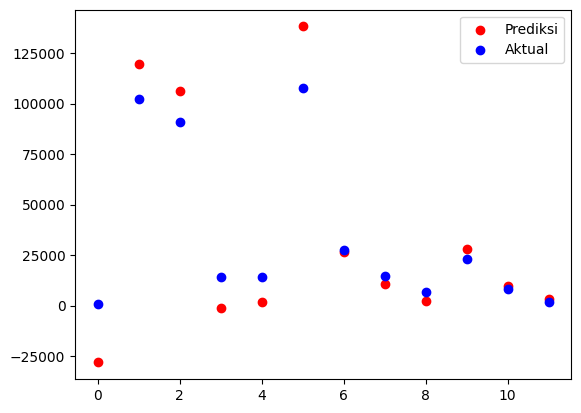

<Figure size 640x480 with 0 Axes>

In [19]:
a1 = range(len(Xtest))
plt.scatter(a1, pred, color='red')
plt.scatter(a1, ytest, color='blue')
plt.legend(["Prediksi", "Aktual"], loc ="upper right") 
plt.figure()

In [20]:
# Define the data as a list of dictionaries
new_data = [
    {'Tahun': 2023, 'Bulan': 'Januari', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Februari', 'Luas Lahan': 36637.27, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Maret', 'Luas Lahan': 35637.23, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'April', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Mei', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Juni', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Juli', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Agustus', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'September', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Oktober', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'November', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Desember', 'Luas Lahan': 1000, 'Luas Panen (ha)': 800}
]
# Create a DataFrame from the list of dictionaries
new_data = pd.DataFrame(data)

# Konversi data kategoris
new_data = pd.get_dummies(new_data, columns=['Bulan'])

# Gunakan model untuk memprediksi produksi padi
predicted_production = model.predict(new_data)

# Tampilkan hasil prediksi
print(f'Prediksi Produksi Padi: {predicted_production[0]}')

/home/kimp/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


ValueError: X has 17 features, but SVR is expecting 4 features as input.